In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('delta_Ki_remove_duplicate_chembl_remove_none_3_class_new_wo_none.csv')
df

,ChEMBL ID,Smiles,Activity_Value,bioactivity_class
0,CHEMBL567175,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,0.1,active
1,CHEMBL2113666,CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O...,0.1,active
2,CHEMBL1649941,CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=...,0.1,active
3,CHEMBL334715,N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@...,0.1,active
4,CHEMBL3785854,Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O...,0.1,active
...,...,...,...,...
3570,CHEMBL3698762,O=c1c(NC(CO)CO)nc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,86219.0,inactive
3571,CHEMBL1076554,Cc1cccc(O)c1C(=O)C1=CCCN2CCC[C@@H]12,94000.0,inactive
3572,CHEMBL3695269,NC(=O)[C@H](CO)Nc1nc2ccccc2n(C2CCN(C3CCCCCCC3)...,96003.0,inactive
3573,CHEMBL233535,NCc1ccccc1C1(O)CCN(CC2CCCCCC2)CC1,99505.0,inactive


In [24]:
import numpy as np

def pKi(input):
    pKi = []

    for i in input['Activity_Value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pKi.append(-np.log10(molar))

    input['pKi'] = pKi
    x = input.drop('Activity_Value_norm', 1)
        
    return x


In [25]:
df.Activity_Value.describe()

count      3575.000000
mean       2621.394070
std        9139.809021
min           0.100000
25%           9.800000
50%         100.000000
75%         882.000000
max      150385.000000
Name: Activity_Value, dtype: float64

In [26]:
-np.log10( (10**-9)* 100000000 )

1.0

In [27]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [28]:
def norm_value(input):
    norm = []

    for i in input['Activity_Value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['Activity_Value_norm'] = norm
    x = input.drop('Activity_Value', 1)
        
    return x

In [30]:
df_norm = norm_value(df)
df_norm

C:\Users\Zizi\AppData\Local\Temp/ipykernel_17008/2370070746.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('Activity_Value', 1)


,ChEMBL ID,Smiles,bioactivity_class,Activity_Value_norm
0,CHEMBL567175,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,active,0.1
1,CHEMBL2113666,CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O...,active,0.1
2,CHEMBL1649941,CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=...,active,0.1
3,CHEMBL334715,N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@...,active,0.1
4,CHEMBL3785854,Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O...,active,0.1
...,...,...,...,...
3570,CHEMBL3698762,O=c1c(NC(CO)CO)nc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,inactive,86219.0
3571,CHEMBL1076554,Cc1cccc(O)c1C(=O)C1=CCCN2CCC[C@@H]12,inactive,94000.0
3572,CHEMBL3695269,NC(=O)[C@H](CO)Nc1nc2ccccc2n(C2CCN(C3CCCCCCC3)...,inactive,96003.0
3573,CHEMBL233535,NCc1ccccc1C1(O)CCN(CC2CCCCCC2)CC1,inactive,99505.0


In [31]:
df_norm.Activity_Value_norm.describe()

count      3575.000000
mean       2621.394070
std        9139.809021
min           0.100000
25%           9.800000
50%         100.000000
75%         882.000000
max      150385.000000
Name: Activity_Value_norm, dtype: float64

In [32]:
df_final = pKi(df_norm)
df_final

C:\Users\Zizi\AppData\Local\Temp/ipykernel_17008/3068478743.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('Activity_Value_norm', 1)


,ChEMBL ID,Smiles,bioactivity_class,pKi
0,CHEMBL567175,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,active,10.000000
1,CHEMBL2113666,CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O...,active,10.000000
2,CHEMBL1649941,CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=...,active,10.000000
3,CHEMBL334715,N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@...,active,10.000000
4,CHEMBL3785854,Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O...,active,10.000000
...,...,...,...,...
3570,CHEMBL3698762,O=c1c(NC(CO)CO)nc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,inactive,4.064397
3571,CHEMBL1076554,Cc1cccc(O)c1C(=O)C1=CCCN2CCC[C@@H]12,inactive,4.026872
3572,CHEMBL3695269,NC(=O)[C@H](CO)Nc1nc2ccccc2n(C2CCN(C3CCCCCCC3)...,inactive,4.017715
3573,CHEMBL233535,NCc1ccccc1C1(O)CCN(CC2CCCCCC2)CC1,inactive,4.002155


In [33]:
df_final.pKi.describe()

count    3575.000000
mean        7.028375
std         1.295445
min         3.822795
25%         6.054532
50%         7.000000
75%         8.008774
max        10.000000
Name: pKi, dtype: float64

In [34]:
df_final.to_csv('data_final_3_class_pKi.csv', index=False)

In [35]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,ChEMBL ID,Smiles,bioactivity_class,pKi
0,CHEMBL567175,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,active,10.000000
1,CHEMBL2113666,CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O...,active,10.000000
2,CHEMBL1649941,CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=...,active,10.000000
3,CHEMBL334715,N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@...,active,10.000000
4,CHEMBL3785854,Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O...,active,10.000000
...,...,...,...,...
3570,CHEMBL3698762,O=c1c(NC(CO)CO)nc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,inactive,4.064397
3571,CHEMBL1076554,Cc1cccc(O)c1C(=O)C1=CCCN2CCC[C@@H]12,inactive,4.026872
3572,CHEMBL3695269,NC(=O)[C@H](CO)Nc1nc2ccccc2n(C2CCN(C3CCCCCCC3)...,inactive,4.017715
3573,CHEMBL233535,NCc1ccccc1C1(O)CCN(CC2CCCCCC2)CC1,inactive,4.002155


In [36]:
df_2class.to_csv('data_final_2_class_pKi.csv', index=False)

In [37]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

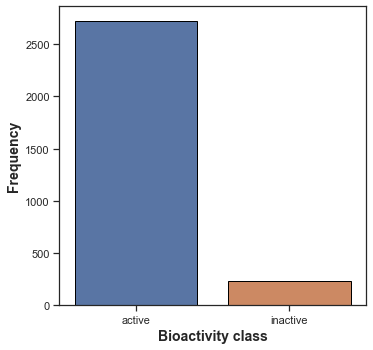

In [38]:
plot = plt.figure(figsize=(5.5, 5.5))

detail = sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [ ]:
import matplotlib.pyplot as plt

In [39]:
plt.figure(figsize=(5.5, 5.5))

<Figure size 396x396 with 0 Axes>

<Figure size 396x396 with 0 Axes>

In [ ]:
import seaborn as sns

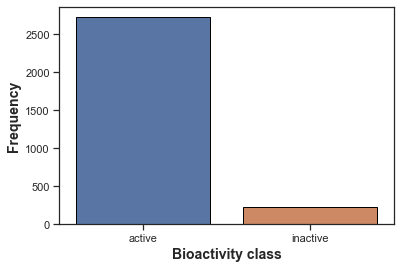

In [40]:
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [41]:
df_2class

,ChEMBL ID,Smiles,bioactivity_class,pKi
0,CHEMBL567175,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,active,10.000000
1,CHEMBL2113666,CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O...,active,10.000000
2,CHEMBL1649941,CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=...,active,10.000000
3,CHEMBL334715,N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@...,active,10.000000
4,CHEMBL3785854,Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O...,active,10.000000
...,...,...,...,...
3570,CHEMBL3698762,O=c1c(NC(CO)CO)nc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,inactive,4.064397
3571,CHEMBL1076554,Cc1cccc(O)c1C(=O)C1=CCCN2CCC[C@@H]12,inactive,4.026872
3572,CHEMBL3695269,NC(=O)[C@H](CO)Nc1nc2ccccc2n(C2CCN(C3CCCCCCC3)...,inactive,4.017715
3573,CHEMBL233535,NCc1ccccc1C1(O)CCN(CC2CCCCCC2)CC1,inactive,4.002155


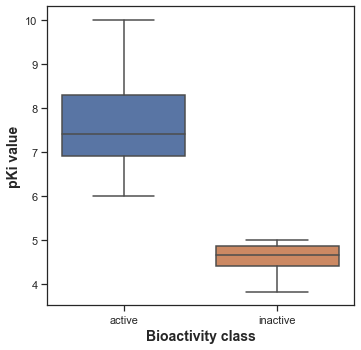

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pKi', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pKi value', fontsize=14, fontweight='bold')

plt.savefig('plot_pKi.pdf')

In [58]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [59]:
mannwhitney('pKi')

,Descriptor,Statistics,p,alpha,Interpretation
0,pKi,627210.0,1.735244e-140,0.05,Different distribution (reject H0)


In [60]:
import pandas as pd

In [61]:
selection = ['Smiles','ChEMBL ID']
df_selection = df_2class[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [63]:
! cat molecule.smi | head -5

Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O)Cc2c1[nH]c1c2cccc1)CC1CC1	CHEMBL567175
CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O)/C=C/c2ccccc2Cl)[C@H]1C5	CHEMBL2113666
CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=O)NCC(=O)N[C@@H](Cc1ccc(Cl)cc1)C(=O)N1CCC(N(C(=O)CC)c2ccccc2)CC1	CHEMBL1649941
N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@H]1Oc2c(O)ccc4c2C12CCN(CC1CC1)C(C4)[C@]2(O)C3)C(=O)O	CHEMBL334715
Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O)Cc1c([nH]c2ccccc12)C3	CHEMBL3785854


cat: write error: No space left on device


In [64]:
! cat molecule.smi | wc -l

2957


In [66]:
from padelpy import padeldescriptor

In [67]:
padeldescriptor(fingerprints=True, mol_dir='molecule.smi', d_file='descriptors.csv')

In [69]:
df_desc = pd.read_csv('descriptors.csv')

In [70]:
df_desc

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL607125,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2113666,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1649941,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL567175,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3785854,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,CHEMBL3139213,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,CHEMBL3596371,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1084,CHEMBL3216613,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1085,CHEMBL610037,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df_Y = df_2class['pKi']
df_Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
3570     4.064397
3571     4.026872
3572     4.017715
3573     4.002155
3574     3.822795
Name: pKi, Length: 2957, dtype: float64

In [76]:
dataset = pd.concat([df_desc,df_Y], axis=1)
dataset

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pKi
0,CHEMBL607125,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
1,CHEMBL2113666,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
2,CHEMBL1649941,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
3,CHEMBL567175,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
4,CHEMBL3785854,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.064397
3571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.026872
3572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.017715
3573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.002155


In [77]:
dataset.to_csv('dataset_fp_pki.csv', index=False)

In [79]:
dataset1 = pd.read_csv('dataset_fp_pki_deleted_nan.csv')
dataset1

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pKi
0,CHEMBL607125,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.000000
1,CHEMBL2113666,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.000000
2,CHEMBL1649941,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.000000
3,CHEMBL567175,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.000000
4,CHEMBL3785854,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,CHEMBL3139213,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.739929
1083,CHEMBL3596371,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.739929
1084,CHEMBL3216613,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.739929
1085,CHEMBL610037,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.735182


In [80]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [94]:
X = dataset1.drop('pKi', axis=1)
X = dataset1.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pKi
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.739929
1083,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.739929
1084,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.739929
1085,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.735182


In [95]:
Y = dataset1.pKi
Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
1082     7.739929
1083     7.739929
1084     7.739929
1085     7.735182
1086     7.735182
Name: pKi, Length: 1087, dtype: float64

In [96]:
X.shape

(1087, 882)

In [97]:
Y.shape

(1087,)

In [99]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [100]:
X.shape

(1087, 143)

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [102]:
X_train.shape, Y_train.shape

((869, 143), (869,))

In [103]:
X_test.shape, Y_test.shape

((218, 143), (218,))

In [104]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.9999947556170161

In [116]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_test, Y_test)
r2 = model.score(X_train, Y_train)
r2

0.9988375909681648

In [105]:
Y_pred = model.predict(X_test)

C:\Users\Zizi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

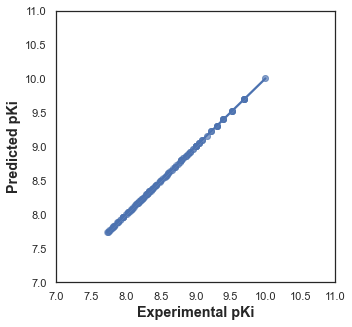

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pKi', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pKi', fontsize='large', fontweight='bold')
ax.set_xlim(7, 11)
ax.set_ylim(7, 11)
ax.figure.set_size_inches(5, 5)
plt.show

In [113]:
Y_pred1 = model.predict(X_train)

C:\Users\Zizi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

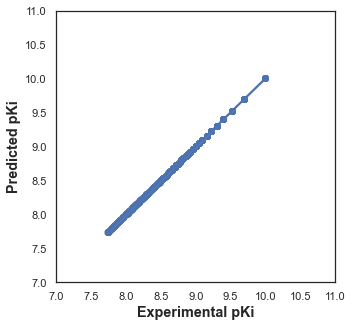

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_train, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pKi', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pKi', fontsize='large', fontweight='bold')
ax.set_xlim(7, 11)
ax.set_ylim(7, 11)
ax.figure.set_size_inches(5, 5)
plt.show